# 12. Длина кратчайшего пути

level: `easy`

## Задача

Дан неориентированный граф. Найдите длину минимального пути между двумя вершинами.

### Формат ввода

В первой строке записано целое число N (1≤N≤100) – количество вершин в графе.

Далее записывается матрица смежности — N строк, в каждой из которых содержится N чисел 0 или 1, разделённых пробелом. 
Число 0 означает отсутствие ребра, а 1 — наличие ребра.

В последней строке задаются номера двух вершин — начальной и конечной.

Вершины нумеруются с единицы.

### Формат вывода

Выведите длину кратчайшего пути — минимальное количество ребер, которые нужно пройти.

Если пути нет, нужно вывести -1.

### Ограничения

**Ограничение времени** 1 с
**Ограничение памяти** 64 МБ

### Пример №1

**Ввод**

```bash
10
0 1 0 0 0 0 0 0 0 0 
1 0 0 1 1 0 1 0 0 0 
0 0 0 0 1 0 0 0 1 0 
0 1 0 0 0 0 1 0 0 0 
0 1 1 0 0 0 0 0 0 1 
0 0 0 0 0 0 1 0 0 1 
0 1 0 1 0 1 0 0 0 0 
0 0 0 0 0 0 0 0 1 0 
0 0 1 0 0 0 0 1 0 0 
0 0 0 0 1 1 0 0 0 0 
5 4
```

**Вывод**

```bash
2
```

### Пример №2

**Ввод**

```bash
5
0 1 0 0 1 
1 0 1 0 0 
0 1 0 0 0 
0 0 0 0 0 
1 0 0 0 0 
3 5
```

**Вывод**

```bash
3
```

## Решение

1. Правильное считывание данных

In [45]:
file_path = 'ds/ds1.txt'  # путь до файла с информацией

with open(file_path, 'r') as file:
    n = int(file.readline().strip())
    graph = [list(map(lambda x: int(x), file.readline().strip().split(' '))) for _ in range(n)]
    start, end = list(map(lambda x: int(x) - 1, file.readline().strip().split(' ')))

# check
print(n)
print(*graph, sep='\n')
print(start, end)

10
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
4 3


2. Визуализируем граф

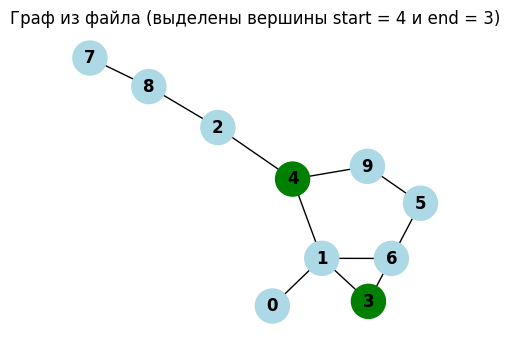

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Добавляем вершины
G.add_nodes_from(range(n))

# Добавляем рёбра
for i in range(n):
    for j in range(i + 1, n):  # избегаем дублирования рёбер
        if graph[i][j]:
            G.add_edge(i, j)
            
# Цвета для вершин
node_colors = []
for node in G.nodes():
    if node in (start, end):
        node_colors.append('green')  # начальная и конечная — красные
    else:
        node_colors.append('lightblue')  # остальные — синие
        
# Отображение графа
pos = nx.spring_layout(G)  # расположение узлов
plt.figure(figsize=(4, 3))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors,
    node_size=600, font_size=12, font_weight='bold', edge_color='black'
)
plt.title(f'Граф из файла (выделены вершины start = {start} и end = {end})')
plt.show()

3. Опишем обход графа в ширину на матрице смежности

In [47]:
# классический обход графа в ширину

def bfs(graph, n, start):
    
    visited = [False] * n
    q = [start]
    
    visited[start] = True
    
    while q:
        vis = q[0]
        
        # Print current node
        print(vis, end = ' ')
        q.pop(0)
        
        for i in range(n):
            if graph[vis][i] == 1 and not visited[i]:
                q.append(i)
                visited[i] = True
                
bfs(graph, n, start)

4 1 2 9 0 3 6 8 5 7 

In [48]:
def bfs_shortest_distance(graph, n, start, end):
    visited = [False] * n
    distance = [0] * n  # расстояния от start
    parent = [-1] * n   # для восстановления пути (если нужно)
    
    q = [start]
    visited[start] = True
    
    while q:
        current = q[0]
        q.pop(0)
        
        if current == end:
            break  # можно выйти раньше, если дошли до цели
        
        for neighbor in range(n):
            if graph[current][neighbor] == 1 and not visited[neighbor]:
                visited[neighbor] = True
                distance[neighbor] = distance[current] + 1
                parent[neighbor] = current
                q.append(neighbor)
    
    if visited[end]:
        print(f"Минимальное расстояние от {start} до {end}: {distance[end]}")
        
        # Восстановим путь, если нужно
        path = []
        v = end
        while v != -1:
            path.append(v)
            v = parent[v]
        path.reverse()
        print("Путь:", ' -> '.join(map(str, path)))
        return distance[end], path
    else:
        print(f"Путь от {start} до {end} не существует")
        return -1, []

bfs_shortest_distance(graph, n, start, end)

Минимальное расстояние от 4 до 3: 2
Путь: 4 -> 1 -> 3


(2, [4, 1, 3])